# Customer Churn Prediction

__Customer churn presents a significant challenge for telecom companies. It occurs when customers switch from one telecom provider to another. This issue is important for several reasons, and there are strategies that telecom companies can employ to address it.__

__Why Does Churn Happen?__ <p>
Churn can happen for various reasons, with some of the most common being:
* __Poor Service Quality__: Frequent dropped calls, slow internet speed, or other technical problems can prompt customers to switch providers.
* __Better Deals Elsewhere__: Customers may change providers if they discover more attractive rates or packages offered by competitors.
* __Bad Customer Service__: Unfriendly or unhelpful customer service can push customers to seek better experiences with other companies.
* __Lack of New Features__: If a provider fails to keep up with the latest technological advancements, customers might look for more innovative options elsewhere. <p>

__Why is churn a problem?__
* When customers leave, it costs telecom companies money to replace them. It's much more cost-effective to retain existing customers than to attract new ones. Additionally, churn can impact a company's reputation—if a large number of customers leave, it suggests that the provider is failing to meet their needs. <p>

__What is the Objective?__
* The primary focus of this project is to conduct an in-depth analysis of a Telco dataset to understand the specific reasons why customers are leaving (churning) and to identify patterns through comprehensive data analysis. Additionally, machine learning techniques such as Artificial Neural Networks (ANN), Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTMN), and XGBoost will be implemented to predict future churn. <p>

__The dataset used in this project is obtained from a telecommunications company and includes various customer details. The objective is to predict potential service cancellations (churn) by examining different factors, including:__
* __Demographics__: Customer gender, age group (senior citizen or not), and family setup (partners and dependents).
* __Services Used__: Whether the customer uses phone services, has multiple lines, internet services, additional security features, support services, and streaming.
* __Account Details__: Type of contract, payment method, monthly and total billing amounts, and churn record. Analyzing these factors can help identify customers who may be likely to leave the service. <p>

__Telco Customer Churn from Kaggle.__
* Context: Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets].
* [Click here to access ](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)



## Import Libraries

In [58]:
%%capture
pip install iterative-stratification

In [60]:
# Data libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  
import plotly.express as px
import plotly.graph_objects as go

# Feature Processing (Scikit-learn processing, etc. )
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, RobustScaler, LabelEncoder, OneHotEncoder, StandardScaler, MultiLabelBinarizer, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

# Other packages
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*Do not pass an `input_shape`.*")  # Suppress the specific warning

#Exporting Key Components
import pickle

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SimpleRNN

from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

import optuna

from scipy.stats import mode

from pprint import pprint
sns.set(style = 'white')

warnings.filterwarnings('ignore')

sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

pd.set_option('display.max_rows', 100)
set_config(transform_output = 'pandas')
pd.options.mode.chained_assignment = None

## Importing Data
* Import the data and perform initial check for data type and any missing value

In [15]:
df = pd.read_csv('Telco_Customer_Churn.csv')
print(f'Number of rows and columns: {df.shape}')

df.head(10)

Number of rows and columns: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [16]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Now it is important to remove all Null rows. they wont affect all dataset as they are only tiny portion of dataset. after I will convert all categorical column into dummy variables as well as dropping customerID

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# drop customerID
df = df.iloc[:,1:]
# Convert 'TotalCharges' to numeric, handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])


# Convert all categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


## Visualization
* First of all, a correlation matrix plot must be made to have quick insight what is happening inside the dataset.

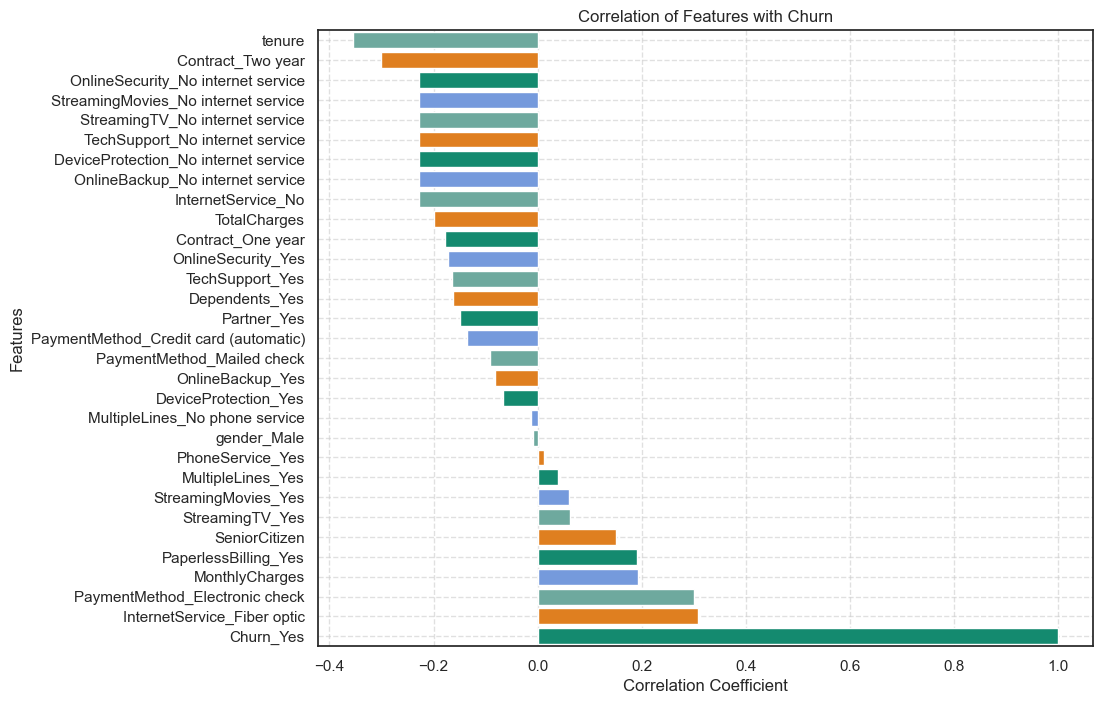

In [19]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Extract the correlation values with respect to 'Churn_Yes' column
churn_corr = corr_matrix['Churn_Yes'].sort_values()

color_palette = ['#64B3A4', '#FF7F00', '#009E79', '#6495ED']

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

__From above chart we can define:__
* Customers with fiber optic internet or those using electronic checks are more likely to cancel their service. This could be because these customers are experiencing higher costs or billing problems.

* Customers who sign up for longer contracts (two or one year) are less likely to churn. This suggests that longer contracts are effective in reducing churn.

* Customers who have additional tech services like online security, tech support, or device protection are less likely to churn. This shows that these services are valuable to customers and can help to reduce churn.

* Older customers are more likely to churn. This suggests that it is important to tailor services and communications to the needs of older customers to reduce turnover

Now, it is important to check distribution of numerical column towards churn.

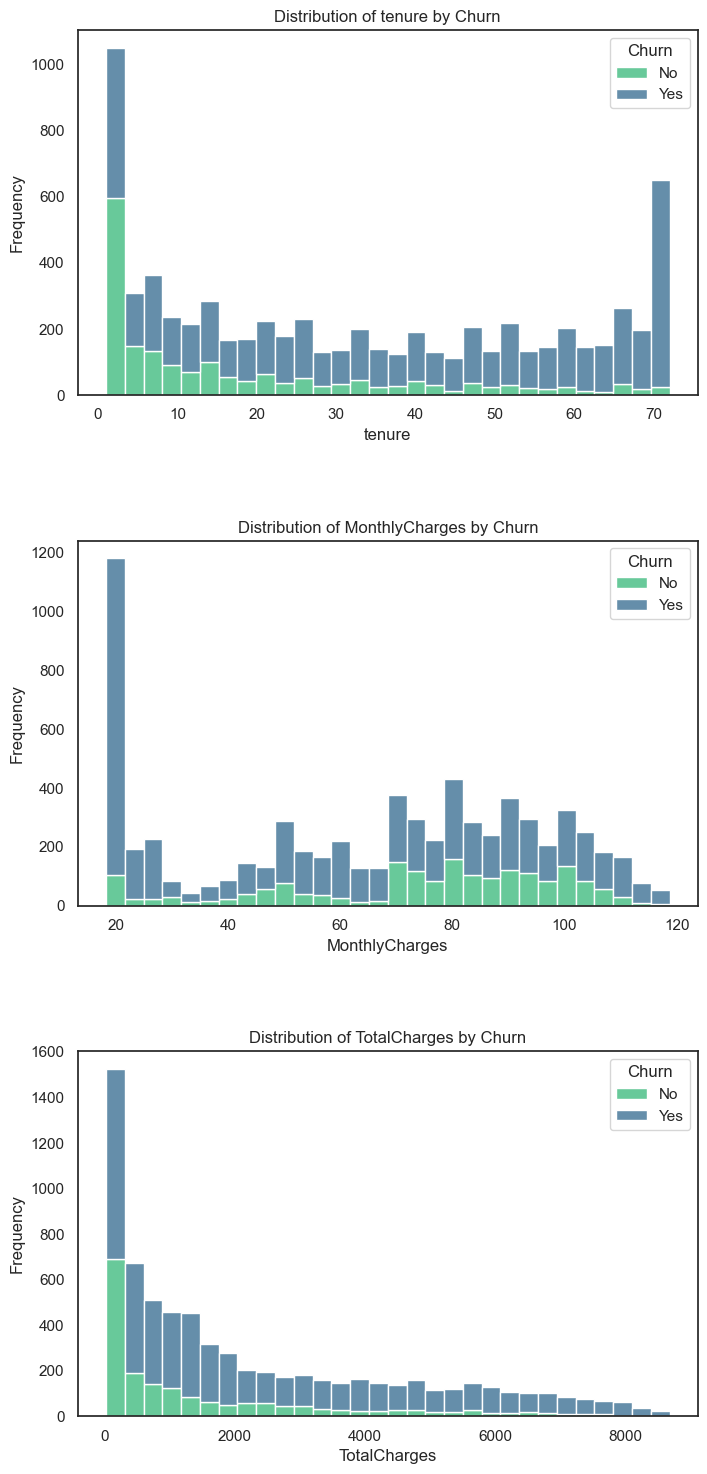

In [20]:
# define NO of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

plt.show()

Next, the distribution plot must be performed for other important columns

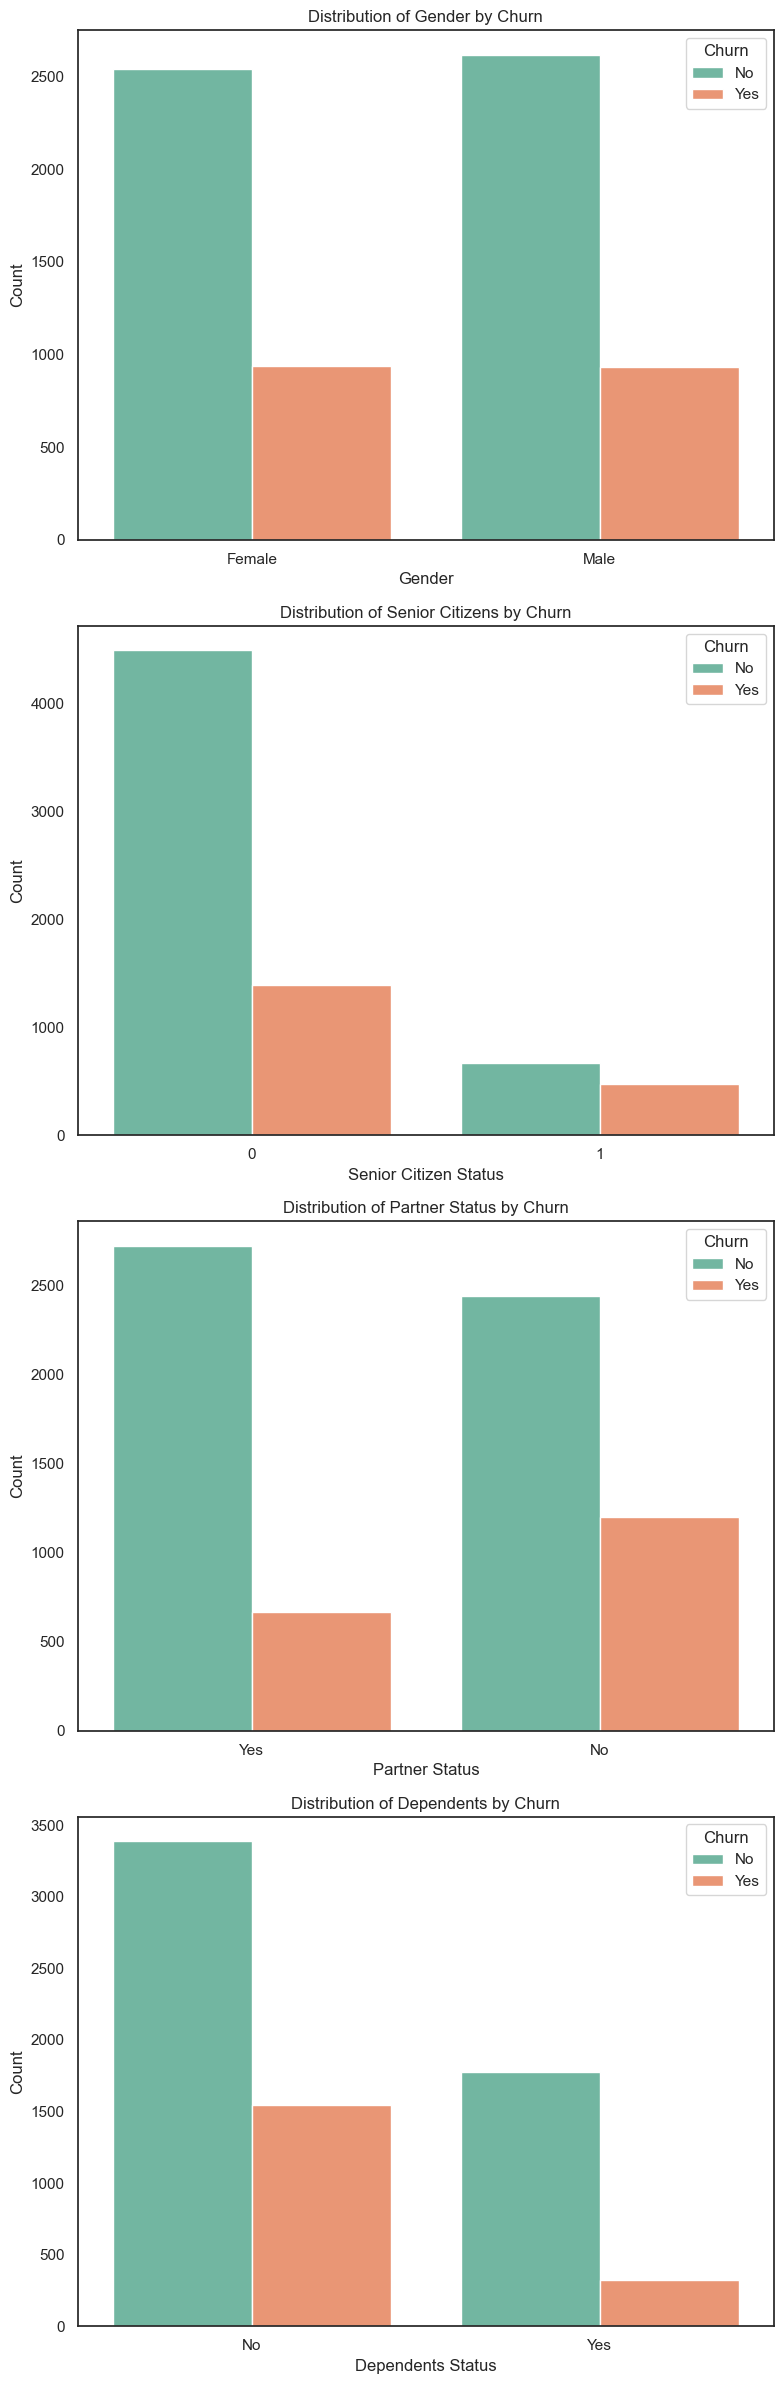

In [21]:
# Nomber of plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 24))
fig.subplots_adjust(hspace=0.5)

# Gender distribution by Churn
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Gender by Churn')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Churn', labels=['No', 'Yes'])

# Senior Citizen distribution by Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Senior Citizens by Churn')
axes[1].set_xlabel('Senior Citizen Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn', labels=['No', 'Yes'])

# Partner distribution by Churn
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Distribution of Partner Status by Churn')
axes[2].set_xlabel('Partner Status')
axes[2].set_ylabel('Count')
axes[2].legend(title='Churn', labels=['No', 'Yes'])

# Dependents distribution by Churn
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[3], palette='Set2')
axes[3].set_title('Distribution of Dependents by Churn')
axes[3].set_xlabel('Dependents Status')
axes[3].set_ylabel('Count')
axes[3].legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

### Some insights:

__Gender by Churn:__
* The churn rates appear balanced between male and female customers, suggesting that gender does not have a significant impact on churn in this dataset.

__Senior Citizen by Churn:__
* Senior citizens have a higher churn rate compared to non-senior citizens. This could be due to different service needs, pricing sensitivity, or possibly dissatisfaction with the available offerings.

__Partner Status by Churn:__
* Customers without partners tend to churn at a higher rate than those with partners. This might indicate that customers with partners have different needs or satisfaction levels, potentially influenced by shared decision-making or economic factors.

__Dependents by Churn:__
* Customers without dependents are more likely to churn

Additionally, clusters of main columns of the dataset in terms of impact on customer churn must be created. We can refer back to the correlation analysis we performed earlier. From that analysis, we identified the features with the most significant positive or negative correlations with churn. These features tend to have a strong impact on whether customers decide to leave or stay.

__The most impactful features were:__
* Tenure
* Monthly
* Total
* InternetService
* Contract
* PaymentMethod

### __A K-means clustering must be performed, It has to be based on these impactful features to identify customer segments that might be at risk of churning.__

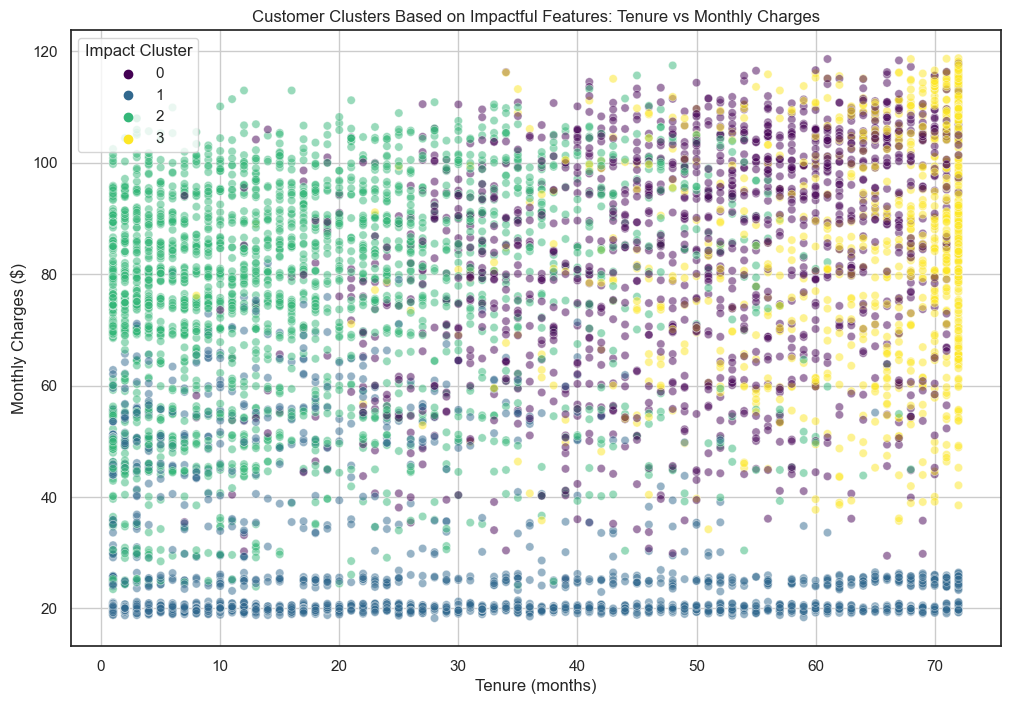

In [22]:
# One-hot encoding the categorical columns
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
data_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Including the numerical columns
impactful_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].join(data_encoded)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(impactful_features)

# Applying K-means clustering
kmeans_impact = KMeans(n_clusters=4, random_state=42)
clusters_impact = kmeans_impact.fit_predict(features_scaled)

# Adding the cluster labels to the original data
df['Impact_Cluster'] = clusters_impact

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Impact_Cluster', palette='viridis', data=df, alpha=0.5)
plt.title('Customer Clusters Based on Impactful Features: Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Impact Cluster')
plt.grid(True)
plt.show()

__Insights:__

__Cluster 0 (light green):__ customers with medium to high monthly charges and a range of tenure lengths. This could be a segment that uses more services or higher-tier services.

__Cluster 1 (purple):__ This cluster have higher monthly charges and longer tenure, possibly representing loyal customers with high service usage or premium services.

__Cluster 2 (yellow):__ Customers in this cluster have lower monthly charges and shorter tenure, indicating newer or more price-sensitive customers.

__Cluster 3 (blue):__ Encompasses customers with lower to medium monthly charges and a broad range of tenure, possibly indicating a mixed segment with stable, yet budget-conscious customers.

### Chart based on the number of churned versus non-churned customers in each clusters.

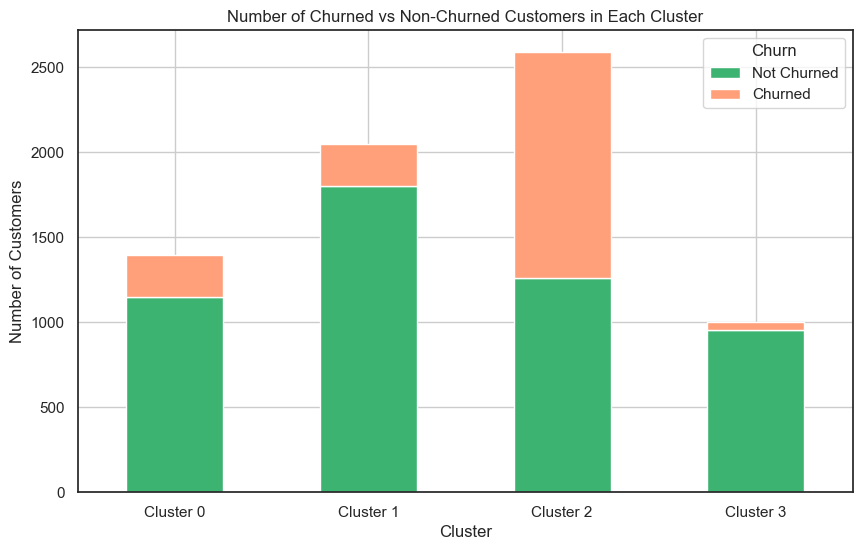

Churn,No,Yes
Impact_Cluster,,
0,1146,251
1,1803,244
2,1258,1331
3,956,43


In [23]:
# Counting churned and non-churned customers in each cluster
churn_counts = df.groupby(['Impact_Cluster', 'Churn']).size().unstack(fill_value=0)

# Plotting the churn counts
churn_counts.plot(kind='bar', stacked=True, color=['mediumseagreen', 'lightsalmon'], figsize=(10, 6))
plt.title('Number of Churned vs Non-Churned Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.grid(True)
plt.show()

churn_counts

### Summary results from exprolatory analysis

* Churn is higher among customers with fiber optic internet — possibly due to expectations not being met related to the quality or price of the service. Month-to-month contracts are associated with higher churn rates — indicating that the lack of long-term commitment allows customers to switch providers more easily. Higher monthly charges are linked to increased churn — which may reflect customer sensitivity to pricing or competitive offers. Shorter tenure correlates strongly with churn — suggesting newer customers are at a higher risk of leaving, possibly due to initial dissatisfaction or better competing offers.

* Clustering based on impactful features (tenure, monthly and total charges, service types, and payment methods) highlighted distinct customer segments:

* __Cluster 0:__ Balanced churn and retention, possibly indicating mixed satisfaction levels or service experiences. __Cluster 1:__ High retention, likely indicating satisfaction with services or pricing, making them valuable for long-term growth strategies. __Cluster 2__ and __Cluster 3:__ Moderate to low churn, suggesting these segments experience fair satisfaction but could still benefit from targeted improvements or loyalty programs.

* Month-to-month contracts, the absence of online security, and the lack of tech support appear to have a positive correlation with churn. Conversely, longer tenure and opting for two-year contracts show a negative correlation with churn. Notably, services like online security, streaming TV, online backup, and tech support, which can be accessed offline, seem to have a negative relationship with churn.

* _Green slics shows that 27% of customer has left company and our goal is to inspect which type of customer did it_.

## Preprocessing Data

In [24]:
categorical = df.select_dtypes("object")
encoder = OrdinalEncoder().fit(categorical)
encoded = encoder.transform(categorical)
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [25]:
number = df.select_dtypes("number").reset_index(drop=True)
cate = pd.DataFrame(encoded.astype("int64"),columns=categorical.columns).reset_index(drop=True)
df = pd.concat([number,cate],axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Impact_Cluster,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,2,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


__Modeling Using XGBoost__

* Our dataset has a problem where some categories have far fewer examples than others. This can make it difficult for our model to learn effectively. To fix this, we use a technique called SMOTE to create new, realistic examples for the smaller categories. This balances out the dataset and helps the model learn better.

* I then, the dataset will be split into training and testing sets to ensure the model hasn't learned from the test set. We choose the XGBoost Classifier because it's good at handling imbalanced data.

* Finally, we tune the model's hyperparameters to find the best combination of settings. This helps us get the best possible performance from the model.

In [26]:
# Split the dataset
X = df.iloc[:,:-1]
Y = df.iloc[:,-1].values

# Handle class imbalance using SMOTE oversampling technique
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

#  XGBoost classifier
xgb = XGBClassifier(verbosity=0)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}



# Perform grid search with cross-validation
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, Y_train)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

final_xgb = XGBClassifier(**best_params)
final_xgb.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_xgb.predict(X_test)

# Evaluate the model
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8369160310494221


__Modelagem usando Rede Neural__

A neural network model will be defined using Keras. The model has three parts:

* Input Layer: Receives the data as input.

* Hidden Layer: Processes the data and extracts features using a specified number of neurons and an activation function.

* Output Layer: Predicts the output, using a sigmoid activation function suitable for binary classification tasks.

To optimize the model's performance, a wrapper class (KerasClassifierWrapper) is created to adapt the Keras model to work with scikit-learn. This allows for hyperparameter tuning using GridSearchCV.

* Hyperparameter Tuning: Hyperparameter tuning involves trying different combinations of hyperparameters to find the best set. In this case, the following hyperparameters are tuned:
Number of neurons Activation function Optimizer Learning rate

In [27]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Split the resampled data 
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# function to create the Keras model
def create_model(neurons=16, activation='relu', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# a wrapper class around the Keras model to make it compatible with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, create_model, **kwargs):
        self.create_model = create_model
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.create_model(**self.kwargs)
        self.model.fit(X, y, epochs=20, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

# Create an instance of the wrapper class
keras_wrapper = KerasClassifierWrapper(create_model)

# Define the grid of hyperparameters to search
param_grid = {
    'neurons': [8, 16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring=make_scorer(roc_auc_score), cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

# Train the final model with the best hyperparameters
final_model = KerasClassifierWrapper(create_model, **best_params)
final_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_model.predict(X_test)





65/65 [==============================] - 0s 1ms/step


In [28]:
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for ANN Model:", roc_auc)

ROC-AUC Score for ANN Model: 0.8772487917883782


__Modeling Using RNN__
* Data normalization must be performed using min-max scaling. This technique scales the input features to a range between 0 and 1, ensuring that all features contribute equally to the model training process.

* Next, the input data is reshaped to accommodate the requirements of a RNN model. RNNs expect input data in the shape (batch_size, timesteps, input_dim).

* Then,a Keras RNN model is defined using the SimpleRNN layer. This layer is suitable for sequential data processing and includes a specified number of neurons and activation function.

* After,a wrapper class KerasClassifierWrapper is implemented to make the Keras RNN model compatible with GridSearchCV, similar to the previous example.

* finally, hyperparameter tuning is performed using GridSearchCV over a predefined grid of hyperparameters, such as the number of neurons, activation function, optimizer, and learning rate.

In [29]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1, 1)

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Normalize the input data
X_train_norm = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
X_test_norm = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))

# Reshape the input data for RNN
X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

# Define the function to create the Keras model
def create_model(neurons=16, activation='relu', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(SimpleRNN(neurons, input_shape=(X_train_norm.shape[1], 1), activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define a wrapper class around the Keras model to make it compatible with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, create_model, **kwargs):
        self.create_model = create_model
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.create_model(**self.kwargs)
        self.model.fit(X, y, epochs=20, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

# Create an instance of the wrapper class
keras_wrapper = KerasClassifierWrapper(create_model)

# Define the grid of hyperparameters to search
param_grid = {
    'neurons': [8, 16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring=make_scorer(roc_auc_score), cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train_norm, Y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

# Train the final model with the best hyperparameters
final_model = KerasClassifierWrapper(create_model, **best_params)
final_model.fit(X_train_norm, Y_train)

# Make predictions on the test set
Y_pred = final_model.predict(X_test_norm)

65/65 [==============================] - 0s 2ms/step


In [30]:
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for RNN Model:", roc_auc)

ROC-AUC Score for RNN Model: 0.89591855477554


__Modeling Using LSTM Method__

* All step is similiar to previous method

In [31]:
# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
# Ensure TensorFlow is running on GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Normalize input data
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
X_train_norm = (X_train - min_val) / (max_val - min_val)
X_test_norm = (X_test - min_val) / (max_val - min_val)

# Reshape data for RNN
X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

# Define the Keras model
def create_model(neurons=50, dropout_rate=0.2, activation='relu', optimizer='adam', learn_rate=0.01):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train_norm.shape[1], 1), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learn_rate), metrics=['accuracy'])
    return model

# Wrapper class for Keras model to use with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, neurons, dropout_rate, activation, optimizer, learn_rate):
        self.neurons = neurons
        self.dropout_rate = dropout_rate
        self.activation = activation
        self.optimizer = optimizer
        self.learn_rate = learn_rate

    def fit(self, X, y, **fit_params):
        self.model = create_model(self.neurons, self.dropout_rate, self.activation, self.optimizer, self.learn_rate)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Setup for GridSearchCV
param_grid = {
    'neurons': [50, 100],
    'dropout_rate': [0.1, 0.2, 0.3],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learn_rate': [0.001, 0.01]
}
grid_search = GridSearchCV(estimator=KerasClassifierWrapper(50, 0.1, 'relu', 'adam', 0.01), param_grid=param_grid,
                           scoring=make_scorer(roc_auc_score), cv=3, n_jobs=-1)
grid_result = grid_search.fit(X_train_norm, Y_train, epochs=10, batch_size=10, verbose=0, callbacks=[EarlyStopping(monitor='loss', patience=3)])

# Get the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Train the final model
final_model = create_model(**grid_result.best_params_)
final_model.fit(X_train_norm, Y_train, epochs=50, batch_size=10, verbose=0)

# Evaluate the model
Y_pred = final_model.predict(X_test_norm)

Please install GPU version of TF
Please install GPU version of TF
Best: 0.828824 using {'activation': 'tanh', 'dropout_rate': 0.2, 'learn_rate': 0.01, 'neurons': 50, 'optimizer': 'adam'}
65/65 [==============================] - 0s 2ms/step


In [32]:
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for LSTM Model:", roc_auc)

ROC-AUC Score for LSTM Model: 0.9261161138928641


Interpreting the models results:

- **ROC-AUC Score for XGBoost model: 0.8369160310494221**
- **ROC-AUC Score for ANN Model: 0.8772487917883782**
- **ROC-AUC Score for RNN Model: 0.89591855477554**
- **ROC-AUC Score for LSTM Model: 0.9261161138928641**

We need to understand what the ROC-AUC score represents. The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score is a measure of the model's ability to distinguish between positive and negative classes. It ranges from 0 to 1, where:

- A score of **0.5** suggests no discriminative power, equivalent to random guessing.
- A score of **1.0** indicates perfect classification.
- Scores closer to **1.0** reflect better performance.

Here is the interpretation of the given results:

1. **XGBoost model: 0.8369160310494221**
   - The XGBoost model has a good performance with a ROC-AUC score of 0.837. This indicates that the model can differentiate between churned and non-churned customers with a high degree of accuracy, but there's still room for improvement.

2. **ANN Model: 0.8772487917883782**
   - The ANN model performs better than the XGBoost model, with a ROC-AUC score of 0.877. This shows an improved ability to correctly classify customers compared to the XGBoost model.

3. **RNN Model: 0.89591855477554**
   - The RNN model further improves upon the performance of the ANN and XGBoost models, achieving a ROC-AUC score of 0.896. This indicates a higher capability to distinguish between churned and non-churned customers.

4. **LSTM Model: 0.9261161138928641**
   - The LSTM model demonstrates the best performance among the models listed, with a ROC-AUC score of 0.926. This suggests a very high accuracy in predicting customer churn, making it the most effective model in this comparison.

In summary, while all the models show good performance, the LSTM model is the most accurate in predicting customer churn, followed by the RNN model, the ANN model, and lastly, the XGBoost model. The higher the ROC-AUC score, the better the model is at correctly distinguishing between customers who churn and those who do not.

In [50]:
# Plotting ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC curve (area = %0.2f)' % roc_auc))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
fig.update_layout(title='Receiver Operating Characteristic',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

# Plotting Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred.round())
cm_fig = px.imshow(cm, text_auto=True, color_continuous_scale='Blues', title='Confusion Matrix')
cm_fig.show()

### Interpretation of the Confusion Matrix

The confusion matrix shown in the plot provides an overview of the model's classification performance in terms of correct and incorrect predictions. Each cell in the matrix represents the count of cases in each category:

- **True Positives (TP)**: 824
- **True Negatives (TN)**: 916
- **False Positives (FP)**: 121
- **False Negatives (FN)**: 205

#### Detailed Analysis:

1. **True Negatives (TN) - 916**:
   - Top-left cell (0, 0): Represents the number of cases where the model correctly predicted that customers would not churn (stay with the service).

2. **False Positives (FP) - 121**:
   - Top-right cell (0, 1): Represents the number of cases where the model predicted that customers would churn, but they actually did not.

3. **False Negatives (FN) - 205**:
   - Bottom-left cell (1, 0): Represents the number of cases where the model predicted that customers would not churn, but they actually did.

4. **True Positives (TP) - 824**:
   - Bottom-right cell (1, 1): Represents the number of cases where the model correctly predicted that customers would churn.

#### Derived Metrics:

From these values, we can calculate important performance metrics of the model:

- **Accuracy**: Proportion of correct predictions (TP and TN) relative to the total number of cases.
   $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{824 + 916}{824 + 916 + 121 + 205} \approx 0.85$

- **Precision**: Proportion of correct positive predictions (TP) relative to the total positive predictions (TP + FP).
   $\text{Precision} = \frac{TP}{TP + FP} = \frac{824}{824 + 121} \approx 0.87$

- **Recall (Sensitivity)**: Proportion of actual positives correctly identified (TP) relative to the total actual positives (TP + FN).
  $\text{Recall} = \frac{TP}{TP + FN} = \frac{824}{824 + 205} \approx 0.80$

- **F1-Score**: Harmonic mean of precision and recall, providing a balance between the two metrics.
  $\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \cdot \frac{0.87 \cdot 0.80}{0.87 + 0.80} \approx 0.83$

#### Conclusion:

The confusion matrix and derived metrics indicate that the model has good overall performance, with high accuracy and precision. However, there are still instances of false positives and false negatives that need to be addressed to further improve the model's performance. Continuous analysis of these errors and implementing tuning techniques can help enhance the model's predictive capability.

### Model evaluation metrics

In [52]:
# Model training with validation split
history = final_model.fit(X_train_norm, Y_train, epochs=50, batch_size=10, verbose=0, validation_split=0.2)

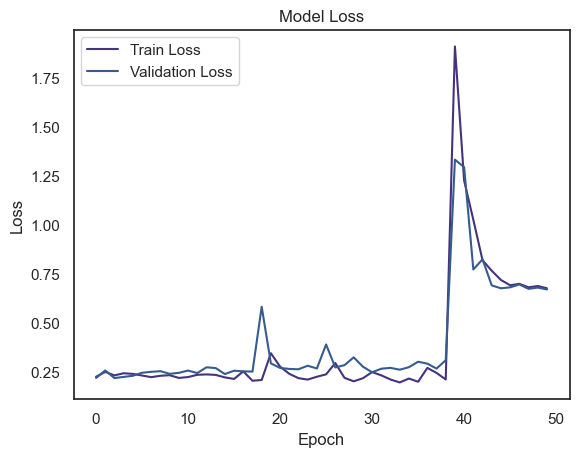

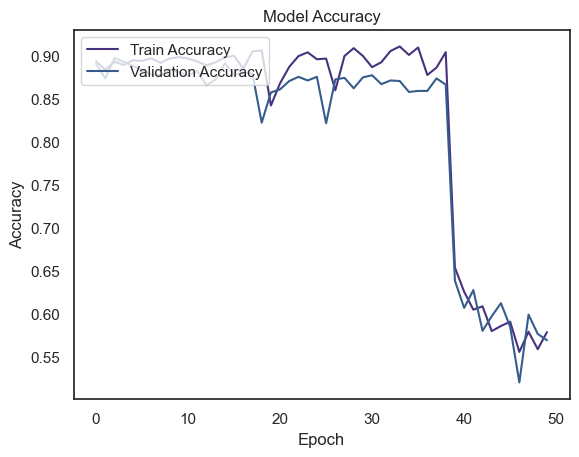

In [53]:
# Plotting training and validation loss values
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plotting training and validation accuracy values
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [57]:
# Serialize model to JSON
model_json = final_model.to_json()  # Supondo que 'final_model' é o modelo treinado
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
final_model.save_weights("model.h5")

print("Saved model to disk")

Saved model to disk


## Code to Load and Compile a Keras Model

The code below shows how to load a Keras model saved in JSON format and its weights saved in an HDF5 file. After loading the model, it is compiled for use again.

```python
from tensorflow.keras.models import model_from_json

# Load JSON and create model
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load weights into the new model
loaded_model.load_weights("model.h5")

print("Loaded model from disk")

# Compile the loaded model before using it
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
